In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## Read Data

In [2]:
data = pd.read_csv("datasets/iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Describe

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data.groupby(by="Species").count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,50,50,50,50
Iris-versicolor,50,50,50,50,50
Iris-virginica,50,50,50,50,50


## Visualize

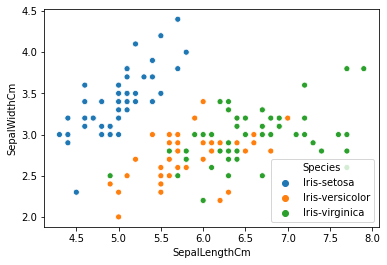

In [7]:
sns.scatterplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=data)

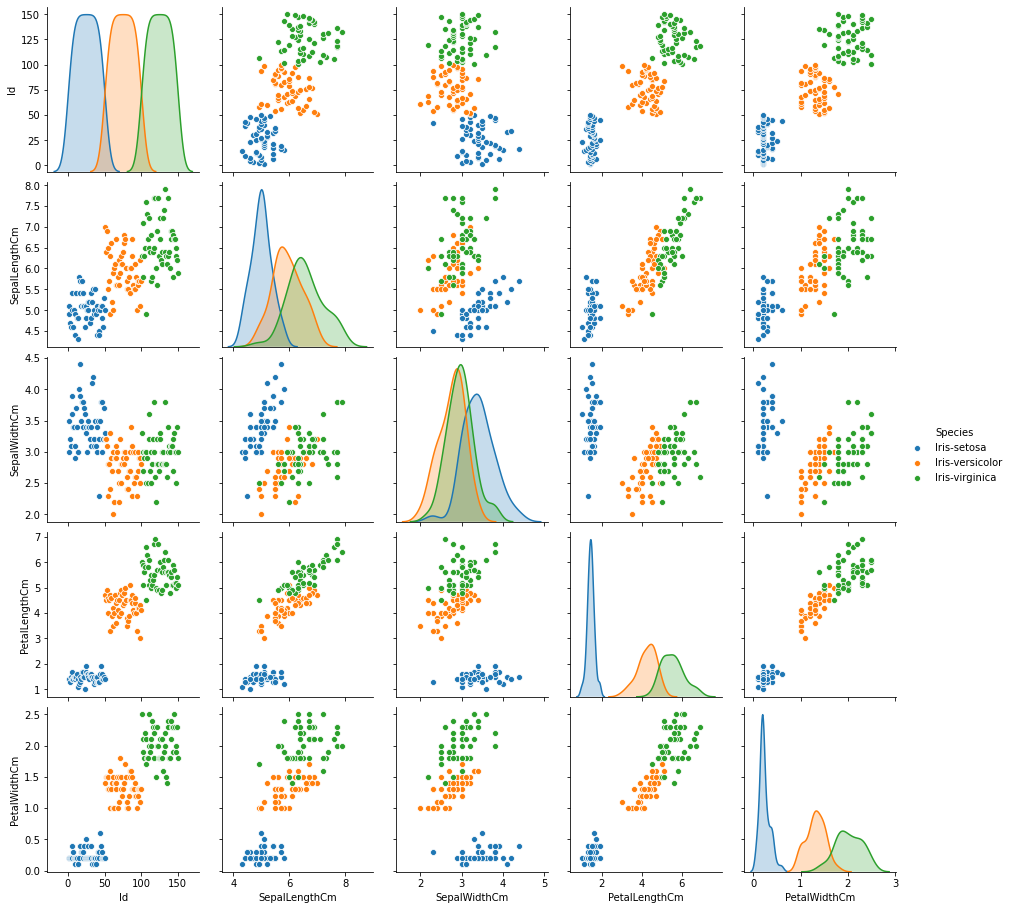

In [8]:
sns.pairplot(data, hue="Species")

## Data Preprocessing

In [9]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
label_encoder = LabelEncoder()
data["Species"] = label_encoder.fit_transform(data["Species"])
    
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
data["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [12]:
data.drop("Id", axis=1, inplace=True)


In [13]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

## Model

In [16]:
import xgboost as xgb

In [17]:
dmatrix_train = xgb.DMatrix(data=X_train, label=y_train)
dmatrix_test = xgb.DMatrix(data=X_test, label=y_test)

In [18]:
param = {'max_depth':3, 
         'eta':1, 
         'objective':'multi:softprob', 
         'num_class':3}

num_round = 5
model = xgb.train(param, dmatrix_train, num_round)

In [19]:
preds = model.predict(dmatrix_test)
preds[:10]

array([[0.0046    , 0.9871078 , 0.00829213],
       [0.00398089, 0.00646372, 0.9895555 ],
       [0.00398902, 0.0044349 , 0.99157614],
       [0.00387317, 0.9924493 , 0.00367761],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.04196233, 0.5648941 , 0.39314362],
       [0.0046    , 0.9871078 , 0.00829213],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.9892699 , 0.00651816, 0.00421197],
       [0.0038679 , 0.9910994 , 0.00503268]], dtype=float32)

In [20]:
best_preds = np.asarray([np.argmax(line) for line in preds])

In [21]:
best_preds

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 2, 1, 0, 0], dtype=int64)

## Metrics

In [22]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 0.9285714285714285
Recall = 0.9473684210526315
Accuracy = 0.94


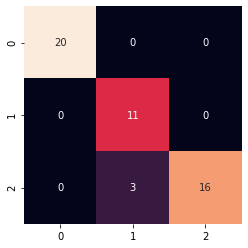

In [23]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_preds)
sns.heatmap(cm, square=True, annot=True, cbar=False)